In [1]:
# Trabalho 1

# O problema será identificar se o sinal de sonar obtido (60 valores reais,
# correspondentes a energia em diferentes bandas de frequência e ângulos de retorno) representa
# uma rocha (“R”) ou uma mina (“M”)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

In [3]:
train_df = pd.read_csv('sonar.train-data', header=None)
test_df  = pd.read_csv('sonar.test-data', header=None) 

In [24]:
#train_df.head()
train_df.shape

(145, 61)

In [25]:
#test_df.head()
test_df.shape

(63, 61)

In [6]:
# Replacing char values by numerical ones
cleanup_nums = {60: {"M": 1.0, "R": 0.0}}

train_df.replace(cleanup_nums, inplace=True)
test_df.replace(cleanup_nums, inplace=True)

print (train_df.head())
print (test_df.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0264  0.0071  0.0342  0.0793  0.1043  0.0783  0.1417  0.1176  0.0453   
1  0.0086  0.0215  0.0242  0.0445  0.0667  0.0771  0.0499  0.0906  0.1229   
2  0.0394  0.0420  0.0446  0.0551  0.0597  0.1416  0.0956  0.0802  0.1618   
3  0.0095  0.0308  0.0539  0.0411  0.0613  0.1039  0.1016  0.1394  0.2592   
4  0.0310  0.0221  0.0433  0.0191  0.0964  0.1827  0.1106  0.1702  0.2804   

       9  ...       51      52      53      54      55      56      57  \
0  0.0945 ...   0.0214  0.0262  0.0177  0.0037  0.0068  0.0121  0.0077   
1  0.1185 ...   0.0072  0.0054  0.0022  0.0016  0.0029  0.0058  0.0050   
2  0.2558 ...   0.0146  0.0040  0.0114  0.0032  0.0062  0.0101  0.0068   
3  0.3745 ...   0.0181  0.0019  0.0102  0.0133  0.0040  0.0042  0.0030   
4  0.4432 ...   0.0204  0.0059  0.0053  0.0079  0.0037  0.0015  0.0056   

       58      59   60  
0  0.0078  0.0066  1.0  
1  0.0024  0.0030  0.0  
2  0.0053  0.0087

In [7]:
# Describing the database
#train_df[60].value_counts()
print(train_df.iloc[:,:-1].describe())
print(test_df.iloc[:,:-1].describe())


               0           1           2           3           4           5   \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     0.029547    0.037821    0.043738    0.054526    0.079002    0.110829   
std      0.022255    0.034114    0.039538    0.048730    0.059642    0.063264   
min      0.003600    0.000600    0.001500    0.006100    0.006700    0.010200   
25%      0.015100    0.014900    0.019100    0.027200    0.039700    0.069000   
50%      0.023300    0.030000    0.034200    0.044500    0.064700    0.092900   
75%      0.035300    0.047400    0.054700    0.062700    0.107000    0.145200   
max      0.131300    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8          9      ...              50  \
count  145.000000  145.000000  145.000000  145.00000     ...      145.000000   
mean     0.122453    0.135608    0.181346    0.21665     ...        0.016110   
std      0.060247    0.081476 

In [8]:
# 145 samples from train/validation dataframe(~70%) + 63 samples from test dataframe (~30%) =  208 samples
X_train = train_df.iloc[:,:-1].values   # Independent variables
y_train = train_df.iloc[:, -1].values   # Dependent variables (classes)

X_test = test_df.iloc[:,:-1].values     # Independent variables
y_test = test_df.iloc[:, -1].values     # Dependent variables (classes)
print ('X_train shape:', X_train.shape)
print ('y_train shape:', y_train.shape)
print ('X_test shape:', X_test.shape)
print ('y_test shape:', y_test.shape)
print(type(X_train))
print(type(y_train))
print(X_train)
print(y_train)

X_train shape: (145, 60)
y_train shape: (145,)
X_test shape: (63, 60)
y_test shape: (63,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[0.0264 0.0071 0.0342 ... 0.0077 0.0078 0.0066]
 [0.0086 0.0215 0.0242 ... 0.005  0.0024 0.003 ]
 [0.0394 0.042  0.0446 ... 0.0068 0.0053 0.0087]
 ...
 [0.0202 0.0104 0.0325 ... 0.0054 0.0073 0.0054]
 [0.0269 0.0383 0.0505 ... 0.0027 0.0055 0.0057]
 [0.0261 0.0266 0.0223 ... 0.0021 0.0028 0.0023]]
[1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1.]


---

In [10]:
# Confusion Matrix

#cm      = confusion_matrix(y_test, y_pred)
#cr      = classification_report(y_test, y_pred)
#print (cm)
#print (cr)

---

Epoch 1 Error: 62.000 Accuracy: 57.241 (%)
Epoch 2 Error: 49.000 Accuracy: 66.207 (%)
Epoch 3 Error: 48.000 Accuracy: 66.897 (%)
Epoch 4 Error: 49.000 Accuracy: 66.207 (%)
Epoch 5 Error: 45.000 Accuracy: 68.966 (%)
Epoch 6 Error: 50.000 Accuracy: 65.517 (%)
Epoch 7 Error: 47.000 Accuracy: 67.586 (%)
Epoch 8 Error: 40.000 Accuracy: 72.414 (%)
Epoch 9 Error: 40.000 Accuracy: 72.414 (%)
Epoch 10 Error: 49.000 Accuracy: 66.207 (%)
Epoch 11 Error: 45.000 Accuracy: 68.966 (%)
Epoch 12 Error: 45.000 Accuracy: 68.966 (%)
Epoch 13 Error: 48.000 Accuracy: 66.897 (%)
Epoch 14 Error: 42.000 Accuracy: 71.034 (%)
Epoch 15 Error: 35.000 Accuracy: 75.862 (%)
Epoch 16 Error: 35.000 Accuracy: 75.862 (%)
Epoch 17 Error: 35.000 Accuracy: 75.862 (%)
Epoch 18 Error: 42.000 Accuracy: 71.034 (%)
Epoch 19 Error: 38.000 Accuracy: 73.793 (%)
Epoch 20 Error: 37.000 Accuracy: 74.483 (%)
Epoch 21 Error: 37.000 Accuracy: 74.483 (%)
Epoch 22 Error: 37.000 Accuracy: 74.483 (%)
Epoch 23 Error: 38.000 Accuracy: 73.793 (

Epoch 186 Error: 24.000 Accuracy: 83.448 (%)
Epoch 187 Error: 26.000 Accuracy: 82.069 (%)
Epoch 188 Error: 35.000 Accuracy: 75.862 (%)
Epoch 189 Error: 25.000 Accuracy: 82.759 (%)
Epoch 190 Error: 34.000 Accuracy: 76.552 (%)
Epoch 191 Error: 28.000 Accuracy: 80.690 (%)
Epoch 192 Error: 22.000 Accuracy: 84.828 (%)
Epoch 193 Error: 29.000 Accuracy: 80.000 (%)
Epoch 194 Error: 24.000 Accuracy: 83.448 (%)
Epoch 195 Error: 24.000 Accuracy: 83.448 (%)
Epoch 196 Error: 24.000 Accuracy: 83.448 (%)
Epoch 197 Error: 20.000 Accuracy: 86.207 (%)
Epoch 198 Error: 32.000 Accuracy: 77.931 (%)
Epoch 199 Error: 26.000 Accuracy: 82.069 (%)
Epoch 200 Error: 23.000 Accuracy: 84.138 (%)
Epoch 201 Error: 19.000 Accuracy: 86.897 (%)
Epoch 202 Error: 26.000 Accuracy: 82.069 (%)
Epoch 203 Error: 18.000 Accuracy: 87.586 (%)
Epoch 204 Error: 30.000 Accuracy: 79.310 (%)
Epoch 205 Error: 18.000 Accuracy: 87.586 (%)
Epoch 206 Error: 38.000 Accuracy: 73.793 (%)
Epoch 207 Error: 27.000 Accuracy: 81.379 (%)
Epoch 208 

Epoch 403 Error: 25.000 Accuracy: 82.759 (%)
Epoch 404 Error: 27.000 Accuracy: 81.379 (%)
Epoch 405 Error: 28.000 Accuracy: 80.690 (%)
Epoch 406 Error: 24.000 Accuracy: 83.448 (%)
Epoch 407 Error: 31.000 Accuracy: 78.621 (%)
Epoch 408 Error: 19.000 Accuracy: 86.897 (%)
Epoch 409 Error: 22.000 Accuracy: 84.828 (%)
Epoch 410 Error: 33.000 Accuracy: 77.241 (%)
Epoch 411 Error: 23.000 Accuracy: 84.138 (%)
Epoch 412 Error: 33.000 Accuracy: 77.241 (%)
Epoch 413 Error: 15.000 Accuracy: 89.655 (%)
Epoch 414 Error: 26.000 Accuracy: 82.069 (%)
Epoch 415 Error: 29.000 Accuracy: 80.000 (%)
Epoch 416 Error: 23.000 Accuracy: 84.138 (%)
Epoch 417 Error: 32.000 Accuracy: 77.931 (%)
Epoch 418 Error: 24.000 Accuracy: 83.448 (%)
Epoch 419 Error: 24.000 Accuracy: 83.448 (%)
Epoch 420 Error: 27.000 Accuracy: 81.379 (%)
Epoch 421 Error: 22.000 Accuracy: 84.828 (%)
Epoch 422 Error: 21.000 Accuracy: 85.517 (%)
Epoch 423 Error: 26.000 Accuracy: 82.069 (%)
Epoch 424 Error: 26.000 Accuracy: 82.069 (%)
Epoch 425 

Epoch 592 Error: 26.000 Accuracy: 82.069 (%)
Epoch 593 Error: 22.000 Accuracy: 84.828 (%)
Epoch 594 Error: 26.000 Accuracy: 82.069 (%)
Epoch 595 Error: 20.000 Accuracy: 86.207 (%)
Epoch 596 Error: 20.000 Accuracy: 86.207 (%)
Epoch 597 Error: 26.000 Accuracy: 82.069 (%)
Epoch 598 Error: 26.000 Accuracy: 82.069 (%)
Epoch 599 Error: 26.000 Accuracy: 82.069 (%)
Epoch 600 Error: 24.000 Accuracy: 83.448 (%)
Epoch 601 Error: 24.000 Accuracy: 83.448 (%)
Epoch 602 Error: 22.000 Accuracy: 84.828 (%)
Epoch 603 Error: 22.000 Accuracy: 84.828 (%)
Epoch 604 Error: 32.000 Accuracy: 77.931 (%)
Epoch 605 Error: 22.000 Accuracy: 84.828 (%)
Epoch 606 Error: 25.000 Accuracy: 82.759 (%)
Epoch 607 Error: 21.000 Accuracy: 85.517 (%)
Epoch 608 Error: 27.000 Accuracy: 81.379 (%)
Epoch 609 Error: 22.000 Accuracy: 84.828 (%)
Epoch 610 Error: 21.000 Accuracy: 85.517 (%)
Epoch 611 Error: 28.000 Accuracy: 80.690 (%)
Epoch 612 Error: 24.000 Accuracy: 83.448 (%)
Epoch 613 Error: 22.000 Accuracy: 84.828 (%)
Epoch 614 

Epoch 799 Error: 22.000 Accuracy: 84.828 (%)
Epoch 800 Error: 28.000 Accuracy: 80.690 (%)
Epoch 801 Error: 27.000 Accuracy: 81.379 (%)
Epoch 802 Error: 16.000 Accuracy: 88.966 (%)
Epoch 803 Error: 25.000 Accuracy: 82.759 (%)
Epoch 804 Error: 26.000 Accuracy: 82.069 (%)
Epoch 805 Error: 26.000 Accuracy: 82.069 (%)
Epoch 806 Error: 26.000 Accuracy: 82.069 (%)
Epoch 807 Error: 24.000 Accuracy: 83.448 (%)
Epoch 808 Error: 24.000 Accuracy: 83.448 (%)
Epoch 809 Error: 25.000 Accuracy: 82.759 (%)
Epoch 810 Error: 26.000 Accuracy: 82.069 (%)
Epoch 811 Error: 25.000 Accuracy: 82.759 (%)
Epoch 812 Error: 22.000 Accuracy: 84.828 (%)
Epoch 813 Error: 30.000 Accuracy: 79.310 (%)
Epoch 814 Error: 21.000 Accuracy: 85.517 (%)
Epoch 815 Error: 18.000 Accuracy: 87.586 (%)
Epoch 816 Error: 22.000 Accuracy: 84.828 (%)
Epoch 817 Error: 22.000 Accuracy: 84.828 (%)
Epoch 818 Error: 22.000 Accuracy: 84.828 (%)
Epoch 819 Error: 23.000 Accuracy: 84.138 (%)
Epoch 820 Error: 27.000 Accuracy: 81.379 (%)
Epoch 821 

Epoch 989 Error: 24.000 Accuracy: 83.448 (%)
Epoch 990 Error: 24.000 Accuracy: 83.448 (%)
Epoch 991 Error: 26.000 Accuracy: 82.069 (%)
Epoch 992 Error: 19.000 Accuracy: 86.897 (%)
Epoch 993 Error: 26.000 Accuracy: 82.069 (%)
Epoch 994 Error: 20.000 Accuracy: 86.207 (%)
Epoch 995 Error: 16.000 Accuracy: 88.966 (%)
Epoch 996 Error: 22.000 Accuracy: 84.828 (%)
Epoch 997 Error: 25.000 Accuracy: 82.759 (%)
Epoch 998 Error: 23.000 Accuracy: 84.138 (%)
Epoch 999 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1000 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1001 Error: 21.000 Accuracy: 85.517 (%)
Epoch 1002 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1003 Error: 16.000 Accuracy: 88.966 (%)
Epoch 1004 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1005 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1006 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1007 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1008 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1009 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1010 Error: 22.000 Accuracy: 84.828 (%)

Epoch 1182 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1183 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1184 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1185 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1186 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1187 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1188 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1189 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1190 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1191 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1192 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1193 Error: 28.000 Accuracy: 80.690 (%)
Epoch 1194 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1195 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1196 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1197 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1198 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1199 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1200 Error: 23.000 Accuracy: 84.138 (%)
Epoch 1201 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1202 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1203 Error: 20.000 Accuracy:

Epoch 1391 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1392 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1393 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1394 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1395 Error: 16.000 Accuracy: 88.966 (%)
Epoch 1396 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1397 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1398 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1399 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1400 Error: 14.000 Accuracy: 90.345 (%)
Epoch 1401 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1402 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1403 Error: 14.000 Accuracy: 90.345 (%)
Epoch 1404 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1405 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1406 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1407 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1408 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1409 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1410 Error: 23.000 Accuracy: 84.138 (%)
Epoch 1411 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1412 Error: 24.000 Accuracy:

Epoch 1574 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1575 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1576 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1577 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1578 Error: 21.000 Accuracy: 85.517 (%)
Epoch 1579 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1580 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1581 Error: 14.000 Accuracy: 90.345 (%)
Epoch 1582 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1583 Error: 14.000 Accuracy: 90.345 (%)
Epoch 1584 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1585 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1586 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1587 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1588 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1589 Error: 28.000 Accuracy: 80.690 (%)
Epoch 1590 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1591 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1592 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1593 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1594 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1595 Error: 26.000 Accuracy:

Epoch 1765 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1766 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1767 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1768 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1769 Error: 13.000 Accuracy: 91.034 (%)
Epoch 1770 Error: 23.000 Accuracy: 84.138 (%)
Epoch 1771 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1772 Error: 14.000 Accuracy: 90.345 (%)
Epoch 1773 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1774 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1775 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1776 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1777 Error: 15.000 Accuracy: 89.655 (%)
Epoch 1778 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1779 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1780 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1781 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1782 Error: 15.000 Accuracy: 89.655 (%)
Epoch 1783 Error: 17.000 Accuracy: 88.276 (%)
Epoch 1784 Error: 16.000 Accuracy: 88.966 (%)
Epoch 1785 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1786 Error: 20.000 Accuracy:

Epoch 1981 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1982 Error: 12.000 Accuracy: 91.724 (%)
Epoch 1983 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1984 Error: 17.000 Accuracy: 88.276 (%)
Epoch 1985 Error: 23.000 Accuracy: 84.138 (%)
Epoch 1986 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1987 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1988 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1989 Error: 17.000 Accuracy: 88.276 (%)
Epoch 1990 Error: 28.000 Accuracy: 80.690 (%)
Epoch 1991 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1992 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1993 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1994 Error: 17.000 Accuracy: 88.276 (%)
Epoch 1995 Error: 21.000 Accuracy: 85.517 (%)
Epoch 1996 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1997 Error: 23.000 Accuracy: 84.138 (%)
Epoch 1998 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1999 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2000 Error: 24.000 Accuracy: 83.448 (%)
Epoch 2001 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2002 Error: 23.000 Accuracy:

Epoch 2194 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2195 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2196 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2197 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2198 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2199 Error: 21.000 Accuracy: 85.517 (%)
Epoch 2200 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2201 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2202 Error: 13.000 Accuracy: 91.034 (%)
Epoch 2203 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2204 Error: 26.000 Accuracy: 82.069 (%)
Epoch 2205 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2206 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2207 Error: 24.000 Accuracy: 83.448 (%)
Epoch 2208 Error: 24.000 Accuracy: 83.448 (%)
Epoch 2209 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2210 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2211 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2212 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2213 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2214 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2215 Error: 17.000 Accuracy:

Epoch 2377 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2378 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2379 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2380 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2381 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2382 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2383 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2384 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2385 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2386 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2387 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2388 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2389 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2390 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2391 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2392 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2393 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2394 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2395 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2396 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2397 Error: 24.000 Accuracy: 83.448 (%)
Epoch 2398 Error: 17.000 Accuracy:

Epoch 2571 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2572 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2573 Error: 13.000 Accuracy: 91.034 (%)
Epoch 2574 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2575 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2576 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2577 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2578 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2579 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2580 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2581 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2582 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2583 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2584 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2585 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2586 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2587 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2588 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2589 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2590 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2591 Error: 21.000 Accuracy: 85.517 (%)
Epoch 2592 Error: 19.000 Accuracy:

Epoch 2755 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2756 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2757 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2758 Error: 13.000 Accuracy: 91.034 (%)
Epoch 2759 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2760 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2761 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2762 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2763 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2764 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2765 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2766 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2767 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2768 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2769 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2770 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2771 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2772 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2773 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2774 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2775 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2776 Error: 10.000 Accuracy:

Epoch 2961 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2962 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2963 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2964 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2965 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2966 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2967 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2968 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2969 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2970 Error: 21.000 Accuracy: 85.517 (%)
Epoch 2971 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2972 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2973 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2974 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2975 Error: 21.000 Accuracy: 85.517 (%)
Epoch 2976 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2977 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2978 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2979 Error: 13.000 Accuracy: 91.034 (%)
Epoch 2980 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2981 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2982 Error: 17.000 Accuracy:

Epoch 3148 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3149 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3150 Error: 13.000 Accuracy: 91.034 (%)
Epoch 3151 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3152 Error: 15.000 Accuracy: 89.655 (%)
Epoch 3153 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3154 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3155 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3156 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3157 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3158 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3159 Error: 22.000 Accuracy: 84.828 (%)
Epoch 3160 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3161 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3162 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3163 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3164 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3165 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3166 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3167 Error: 15.000 Accuracy: 89.655 (%)
Epoch 3168 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3169 Error: 16.000 Accuracy:

Epoch 3348 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3349 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3350 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3351 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3352 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3353 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3354 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3355 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3356 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3357 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3358 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3359 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3360 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3361 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3362 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3363 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3364 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3365 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3366 Error: 8.000 Accuracy: 94.483 (%)
Epoch 3367 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3368 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3369 Error: 13.000 Accuracy: 

Epoch 3528 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3529 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3530 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3531 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3532 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3533 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3534 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3535 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3536 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3537 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3538 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3539 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3540 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3541 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3542 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3543 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3544 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3545 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3546 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3547 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3548 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3549 Error: 16.000 Accuracy:

Epoch 3742 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3743 Error: 15.000 Accuracy: 89.655 (%)
Epoch 3744 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3745 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3746 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3747 Error: 13.000 Accuracy: 91.034 (%)
Epoch 3748 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3749 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3750 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3751 Error: 22.000 Accuracy: 84.828 (%)
Epoch 3752 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3753 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3754 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3755 Error: 20.000 Accuracy: 86.207 (%)
Epoch 3756 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3757 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3758 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3759 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3760 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3761 Error: 11.000 Accuracy: 92.414 (%)
Epoch 3762 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3763 Error: 19.000 Accuracy:

Epoch 3940 Error: 15.000 Accuracy: 89.655 (%)
Epoch 3941 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3942 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3943 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3944 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3945 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3946 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3947 Error: 20.000 Accuracy: 86.207 (%)
Epoch 3948 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3949 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3950 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3951 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3952 Error: 8.000 Accuracy: 94.483 (%)
Epoch 3953 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3954 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3955 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3956 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3957 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3958 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3959 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3960 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3961 Error: 16.000 Accuracy: 

Epoch 4167 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4168 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4169 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4170 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4171 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4172 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4173 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4174 Error: 11.000 Accuracy: 92.414 (%)
Epoch 4175 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4176 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4177 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4178 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4179 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4180 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4181 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4182 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4183 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4184 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4185 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4186 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4187 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4188 Error: 12.000 Accuracy:

Epoch 4357 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4358 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4359 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4360 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4361 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4362 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4363 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4364 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4365 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4366 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4367 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4368 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4369 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4370 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4371 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4372 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4373 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4374 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4375 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4376 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4377 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4378 Error: 10.000 Accuracy:

Epoch 4554 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4555 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4556 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4557 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4558 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4559 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4560 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4561 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4562 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4563 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4564 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4565 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4566 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4567 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4568 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4569 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4570 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4571 Error: 11.000 Accuracy: 92.414 (%)
Epoch 4572 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4573 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4574 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4575 Error: 15.000 Accuracy:

Epoch 4757 Error: 8.000 Accuracy: 94.483 (%)
Epoch 4758 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4759 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4760 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4761 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4762 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4763 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4764 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4765 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4766 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4767 Error: 11.000 Accuracy: 92.414 (%)
Epoch 4768 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4769 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4770 Error: 21.000 Accuracy: 85.517 (%)
Epoch 4771 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4772 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4773 Error: 20.000 Accuracy: 86.207 (%)
Epoch 4774 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4775 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4776 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4777 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4778 Error: 12.000 Accuracy: 

Epoch 4940 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4941 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4942 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4943 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4944 Error: 20.000 Accuracy: 86.207 (%)
Epoch 4945 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4946 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4947 Error: 8.000 Accuracy: 94.483 (%)
Epoch 4948 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4949 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4950 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4951 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4952 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4953 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4954 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4955 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4956 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4957 Error: 21.000 Accuracy: 85.517 (%)
Epoch 4958 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4959 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4960 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4961 Error: 10.000 Accuracy: 

Epoch 5120 Error: 8.000 Accuracy: 94.483 (%)
Epoch 5121 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5122 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5123 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5124 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5125 Error: 17.000 Accuracy: 88.276 (%)
Epoch 5126 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5127 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5128 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5129 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5130 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5131 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5132 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5133 Error: 7.000 Accuracy: 95.172 (%)
Epoch 5134 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5135 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5136 Error: 17.000 Accuracy: 88.276 (%)
Epoch 5137 Error: 17.000 Accuracy: 88.276 (%)
Epoch 5138 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5139 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5140 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5141 Error: 16.000 Accuracy: 8

Epoch 5306 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5307 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5308 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5309 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5310 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5311 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5312 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5313 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5314 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5315 Error: 20.000 Accuracy: 86.207 (%)
Epoch 5316 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5317 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5318 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5319 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5320 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5321 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5322 Error: 23.000 Accuracy: 84.138 (%)
Epoch 5323 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5324 Error: 9.000 Accuracy: 93.793 (%)
Epoch 5325 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5326 Error: 15.000 Accuracy: 89.655 (%)
Epoch 5327 Error: 16.000 Accuracy: 

Epoch 5505 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5506 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5507 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5508 Error: 17.000 Accuracy: 88.276 (%)
Epoch 5509 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5510 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5511 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5512 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5513 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5514 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5515 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5516 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5517 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5518 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5519 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5520 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5521 Error: 11.000 Accuracy: 92.414 (%)
Epoch 5522 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5523 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5524 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5525 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5526 Error: 16.000 Accuracy:

Epoch 5702 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5703 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5704 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5705 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5706 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5707 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5708 Error: 20.000 Accuracy: 86.207 (%)
Epoch 5709 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5710 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5711 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5712 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5713 Error: 11.000 Accuracy: 92.414 (%)
Epoch 5714 Error: 11.000 Accuracy: 92.414 (%)
Epoch 5715 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5716 Error: 15.000 Accuracy: 89.655 (%)
Epoch 5717 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5718 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5719 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5720 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5721 Error: 15.000 Accuracy: 89.655 (%)
Epoch 5722 Error: 19.000 Accuracy: 86.897 (%)
Epoch 5723 Error: 14.000 Accuracy:

Epoch 5911 Error: 8.000 Accuracy: 94.483 (%)
Epoch 5912 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5913 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5914 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5915 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5916 Error: 11.000 Accuracy: 92.414 (%)
Epoch 5917 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5918 Error: 17.000 Accuracy: 88.276 (%)
Epoch 5919 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5920 Error: 11.000 Accuracy: 92.414 (%)
Epoch 5921 Error: 9.000 Accuracy: 93.793 (%)
Epoch 5922 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5923 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5924 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5925 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5926 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5927 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5928 Error: 15.000 Accuracy: 89.655 (%)
Epoch 5929 Error: 19.000 Accuracy: 86.897 (%)
Epoch 5930 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5931 Error: 11.000 Accuracy: 92.414 (%)
Epoch 5932 Error: 8.000 Accuracy: 94

Epoch 6108 Error: 9.000 Accuracy: 93.793 (%)
Epoch 6109 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6110 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6111 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6112 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6113 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6114 Error: 22.000 Accuracy: 84.828 (%)
Epoch 6115 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6116 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6117 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6118 Error: 17.000 Accuracy: 88.276 (%)
Epoch 6119 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6120 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6121 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6122 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6123 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6124 Error: 8.000 Accuracy: 94.483 (%)
Epoch 6125 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6126 Error: 9.000 Accuracy: 93.793 (%)
Epoch 6127 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6128 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6129 Error: 12.000 Accuracy: 91

Epoch 6303 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6304 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6305 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6306 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6307 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6308 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6309 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6310 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6311 Error: 13.000 Accuracy: 91.034 (%)
Epoch 6312 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6313 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6314 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6315 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6316 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6317 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6318 Error: 9.000 Accuracy: 93.793 (%)
Epoch 6319 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6320 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6321 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6322 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6323 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6324 Error: 13.000 Accuracy: 

Epoch 6483 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6484 Error: 9.000 Accuracy: 93.793 (%)
Epoch 6485 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6486 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6487 Error: 13.000 Accuracy: 91.034 (%)
Epoch 6488 Error: 13.000 Accuracy: 91.034 (%)
Epoch 6489 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6490 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6491 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6492 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6493 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6494 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6495 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6496 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6497 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6498 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6499 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6500 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6501 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6502 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6503 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6504 Error: 15.000 Accuracy: 

Epoch 6689 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6690 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6691 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6692 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6693 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6694 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6695 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6696 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6697 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6698 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6699 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6700 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6701 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6702 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6703 Error: 17.000 Accuracy: 88.276 (%)
Epoch 6704 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6705 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6706 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6707 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6708 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6709 Error: 17.000 Accuracy: 88.276 (%)
Epoch 6710 Error: 10.000 Accuracy:

Epoch 6890 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6891 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6892 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6893 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6894 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6895 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6896 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6897 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6898 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6899 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6900 Error: 9.000 Accuracy: 93.793 (%)
Epoch 6901 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6902 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6903 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6904 Error: 13.000 Accuracy: 91.034 (%)
Epoch 6905 Error: 9.000 Accuracy: 93.793 (%)
Epoch 6906 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6907 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6908 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6909 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6910 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6911 Error: 11.000 Accuracy: 9

Epoch 7073 Error: 6.000 Accuracy: 95.862 (%)
Epoch 7074 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7075 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7076 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7077 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7078 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7079 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7080 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7081 Error: 18.000 Accuracy: 87.586 (%)
Epoch 7082 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7083 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7084 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7085 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7086 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7087 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7088 Error: 6.000 Accuracy: 95.862 (%)
Epoch 7089 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7090 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7091 Error: 11.000 Accuracy: 92.414 (%)
Epoch 7092 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7093 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7094 Error: 16.000 Accuracy: 88.

Epoch 7259 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7260 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7261 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7262 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7263 Error: 20.000 Accuracy: 86.207 (%)
Epoch 7264 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7265 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7266 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7267 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7268 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7269 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7270 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7271 Error: 9.000 Accuracy: 93.793 (%)
Epoch 7272 Error: 9.000 Accuracy: 93.793 (%)
Epoch 7273 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7274 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7275 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7276 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7277 Error: 15.000 Accuracy: 89.655 (%)
Epoch 7278 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7279 Error: 20.000 Accuracy: 86.207 (%)
Epoch 7280 Error: 12.000 Accuracy: 91.

Epoch 7457 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7458 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7459 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7460 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7461 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7462 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7463 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7464 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7465 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7466 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7467 Error: 11.000 Accuracy: 92.414 (%)
Epoch 7468 Error: 19.000 Accuracy: 86.897 (%)
Epoch 7469 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7470 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7471 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7472 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7473 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7474 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7475 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7476 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7477 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7478 Error: 14.000 Accuracy: 

Epoch 7638 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7639 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7640 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7641 Error: 7.000 Accuracy: 95.172 (%)
Epoch 7642 Error: 17.000 Accuracy: 88.276 (%)
Epoch 7643 Error: 9.000 Accuracy: 93.793 (%)
Epoch 7644 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7645 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7646 Error: 17.000 Accuracy: 88.276 (%)
Epoch 7647 Error: 20.000 Accuracy: 86.207 (%)
Epoch 7648 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7649 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7650 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7651 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7652 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7653 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7654 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7655 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7656 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7657 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7658 Error: 19.000 Accuracy: 86.897 (%)
Epoch 7659 Error: 13.000 Accuracy: 9

Epoch 7828 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7829 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7830 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7831 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7832 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7833 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7834 Error: 18.000 Accuracy: 87.586 (%)
Epoch 7835 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7836 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7837 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7838 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7839 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7840 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7841 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7842 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7843 Error: 18.000 Accuracy: 87.586 (%)
Epoch 7844 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7845 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7846 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7847 Error: 20.000 Accuracy: 86.207 (%)
Epoch 7848 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7849 Error: 11.000 Accuracy: 9

Epoch 8017 Error: 13.000 Accuracy: 91.034 (%)
Epoch 8018 Error: 17.000 Accuracy: 88.276 (%)
Epoch 8019 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8020 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8021 Error: 13.000 Accuracy: 91.034 (%)
Epoch 8022 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8023 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8024 Error: 17.000 Accuracy: 88.276 (%)
Epoch 8025 Error: 15.000 Accuracy: 89.655 (%)
Epoch 8026 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8027 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8028 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8029 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8030 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8031 Error: 13.000 Accuracy: 91.034 (%)
Epoch 8032 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8033 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8034 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8035 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8036 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8037 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8038 Error: 14.000 Accuracy:

Epoch 8225 Error: 15.000 Accuracy: 89.655 (%)
Epoch 8226 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8227 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8228 Error: 7.000 Accuracy: 95.172 (%)
Epoch 8229 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8230 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8231 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8232 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8233 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8234 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8235 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8236 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8237 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8238 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8239 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8240 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8241 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8242 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8243 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8244 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8245 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8246 Error: 18.000 Accuracy: 8

Epoch 8411 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8412 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8413 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8414 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8415 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8416 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8417 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8418 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8419 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8420 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8421 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8422 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8423 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8424 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8425 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8426 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8427 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8428 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8429 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8430 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8431 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8432 Error: 12.000 Accuracy: 

Epoch 8603 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8604 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8605 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8606 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8607 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8608 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8609 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8610 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8611 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8612 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8613 Error: 9.000 Accuracy: 93.793 (%)
Epoch 8614 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8615 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8616 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8617 Error: 20.000 Accuracy: 86.207 (%)
Epoch 8618 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8619 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8620 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8621 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8622 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8623 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8624 Error: 13.000 Accuracy: 9

Epoch 8791 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8792 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8793 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8794 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8795 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8796 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8797 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8798 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8799 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8800 Error: 6.000 Accuracy: 95.862 (%)
Epoch 8801 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8802 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8803 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8804 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8805 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8806 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8807 Error: 20.000 Accuracy: 86.207 (%)
Epoch 8808 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8809 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8810 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8811 Error: 9.000 Accuracy: 93.793 (%)
Epoch 8812 Error: 12.000 Accuracy: 9

Epoch 8972 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8973 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8974 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8975 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8976 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8977 Error: 9.000 Accuracy: 93.793 (%)
Epoch 8978 Error: 17.000 Accuracy: 88.276 (%)
Epoch 8979 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8980 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8981 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8982 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8983 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8984 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8985 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8986 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8987 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8988 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8989 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8990 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8991 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8992 Error: 6.000 Accuracy: 95.862 (%)
Epoch 8993 Error: 8.000 Accuracy: 94.48

Epoch 9179 Error: 13.000 Accuracy: 91.034 (%)
Epoch 9180 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9181 Error: 17.000 Accuracy: 88.276 (%)
Epoch 9182 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9183 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9184 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9185 Error: 20.000 Accuracy: 86.207 (%)
Epoch 9186 Error: 18.000 Accuracy: 87.586 (%)
Epoch 9187 Error: 18.000 Accuracy: 87.586 (%)
Epoch 9188 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9189 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9190 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9191 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9192 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9193 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9194 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9195 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9196 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9197 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9198 Error: 13.000 Accuracy: 91.034 (%)
Epoch 9199 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9200 Error: 16.000 Accuracy: 88

Epoch 9379 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9380 Error: 6.000 Accuracy: 95.862 (%)
Epoch 9381 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9382 Error: 18.000 Accuracy: 87.586 (%)
Epoch 9383 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9384 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9385 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9386 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9387 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9388 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9389 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9390 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9391 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9392 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9393 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9394 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9395 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9396 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9397 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9398 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9399 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9400 Error: 14.000 Accuracy: 90.3

Epoch 9585 Error: 18.000 Accuracy: 87.586 (%)
Epoch 9586 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9587 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9588 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9589 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9590 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9591 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9592 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9593 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9594 Error: 15.000 Accuracy: 89.655 (%)
Epoch 9595 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9596 Error: 9.000 Accuracy: 93.793 (%)
Epoch 9597 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9598 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9599 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9600 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9601 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9602 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9603 Error: 20.000 Accuracy: 86.207 (%)
Epoch 9604 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9605 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9606 Error: 14.000 Accuracy: 90.3

Epoch 9764 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9765 Error: 9.000 Accuracy: 93.793 (%)
Epoch 9766 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9767 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9768 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9769 Error: 15.000 Accuracy: 89.655 (%)
Epoch 9770 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9771 Error: 18.000 Accuracy: 87.586 (%)
Epoch 9772 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9773 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9774 Error: 15.000 Accuracy: 89.655 (%)
Epoch 9775 Error: 19.000 Accuracy: 86.897 (%)
Epoch 9776 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9777 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9778 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9779 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9780 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9781 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9782 Error: 13.000 Accuracy: 91.034 (%)
Epoch 9783 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9784 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9785 Error: 14.000 Accuracy: 9

Epoch 9960 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9961 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9962 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9963 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9964 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9965 Error: 6.000 Accuracy: 95.862 (%)
Epoch 9966 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9967 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9968 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9969 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9970 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9971 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9972 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9973 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9974 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9975 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9976 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9977 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9978 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9979 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9980 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9981 Error: 10.000 Accuracy: 93.1

Epoch 10135 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10136 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10137 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10138 Error: 18.000 Accuracy: 87.586 (%)
Epoch 10139 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10140 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10141 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10142 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10143 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10144 Error: 18.000 Accuracy: 87.586 (%)
Epoch 10145 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10146 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10147 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10148 Error: 13.000 Accuracy: 91.034 (%)
Epoch 10149 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10150 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10151 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10152 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10153 Error: 13.000 Accuracy: 91.034 (%)
Epoch 10154 Error: 15.000 Accuracy: 89.655 (%)
Epoch 10155 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10156 Error:

Epoch 10326 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10327 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10328 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10329 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10330 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10331 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10332 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10333 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10334 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10335 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10336 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10337 Error: 18.000 Accuracy: 87.586 (%)
Epoch 10338 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10339 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10340 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10341 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10342 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10343 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10344 Error: 13.000 Accuracy: 91.034 (%)
Epoch 10345 Error: 17.000 Accuracy: 88.276 (%)
Epoch 10346 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10347 Error

Epoch 10522 Error: 21.000 Accuracy: 85.517 (%)
Epoch 10523 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10524 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10525 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10526 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10527 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10528 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10529 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10530 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10531 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10532 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10533 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10534 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10535 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10536 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10537 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10538 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10539 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10540 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10541 Error: 6.000 Accuracy: 95.862 (%)
Epoch 10542 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10543 Error:

Epoch 10703 Error: 13.000 Accuracy: 91.034 (%)
Epoch 10704 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10705 Error: 18.000 Accuracy: 87.586 (%)
Epoch 10706 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10707 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10708 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10709 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10710 Error: 17.000 Accuracy: 88.276 (%)
Epoch 10711 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10712 Error: 6.000 Accuracy: 95.862 (%)
Epoch 10713 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10714 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10715 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10716 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10717 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10718 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10719 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10720 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10721 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10722 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10723 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10724 Erro

Epoch 10897 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10898 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10899 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10900 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10901 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10902 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10903 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10904 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10905 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10906 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10907 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10908 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10909 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10910 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10911 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10912 Error: 13.000 Accuracy: 91.034 (%)
Epoch 10913 Error: 15.000 Accuracy: 89.655 (%)
Epoch 10914 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10915 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10916 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10917 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10918 Erro

Epoch 11111 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11112 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11113 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11114 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11115 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11116 Error: 13.000 Accuracy: 91.034 (%)
Epoch 11117 Error: 13.000 Accuracy: 91.034 (%)
Epoch 11118 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11119 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11120 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11121 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11122 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11123 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11124 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11125 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11126 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11127 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11128 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11129 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11130 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11131 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11132 Erro

Epoch 11291 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11292 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11293 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11294 Error: 11.000 Accuracy: 92.414 (%)
Epoch 11295 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11296 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11297 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11298 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11299 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11300 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11301 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11302 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11303 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11304 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11305 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11306 Error: 18.000 Accuracy: 87.586 (%)
Epoch 11307 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11308 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11309 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11310 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11311 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11312 Error: 

Epoch 11481 Error: 6.000 Accuracy: 95.862 (%)
Epoch 11482 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11483 Error: 6.000 Accuracy: 95.862 (%)
Epoch 11484 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11485 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11486 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11487 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11488 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11489 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11490 Error: 9.000 Accuracy: 93.793 (%)
Epoch 11491 Error: 15.000 Accuracy: 89.655 (%)
Epoch 11492 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11493 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11494 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11495 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11496 Error: 18.000 Accuracy: 87.586 (%)
Epoch 11497 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11498 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11499 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11500 Error: 20.000 Accuracy: 86.207 (%)
Epoch 11501 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11502 Error: 12

Epoch 11679 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11680 Error: 18.000 Accuracy: 87.586 (%)
Epoch 11681 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11682 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11683 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11684 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11685 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11686 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11687 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11688 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11689 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11690 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11691 Error: 15.000 Accuracy: 89.655 (%)
Epoch 11692 Error: 11.000 Accuracy: 92.414 (%)
Epoch 11693 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11694 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11695 Error: 11.000 Accuracy: 92.414 (%)
Epoch 11696 Error: 13.000 Accuracy: 91.034 (%)
Epoch 11697 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11698 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11699 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11700 Error

Epoch 11871 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11872 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11873 Error: 9.000 Accuracy: 93.793 (%)
Epoch 11874 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11875 Error: 15.000 Accuracy: 89.655 (%)
Epoch 11876 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11877 Error: 6.000 Accuracy: 95.862 (%)
Epoch 11878 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11879 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11880 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11881 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11882 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11883 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11884 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11885 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11886 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11887 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11888 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11889 Error: 9.000 Accuracy: 93.793 (%)
Epoch 11890 Error: 13.000 Accuracy: 91.034 (%)
Epoch 11891 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11892 Error

Epoch 12072 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12073 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12074 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12075 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12076 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12077 Error: 7.000 Accuracy: 95.172 (%)
Epoch 12078 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12079 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12080 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12081 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12082 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12083 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12084 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12085 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12086 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12087 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12088 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12089 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12090 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12091 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12092 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12093 Error: 8.0

Epoch 12300 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12301 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12302 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12303 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12304 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12305 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12306 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12307 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12308 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12309 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12310 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12311 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12312 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12313 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12314 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12315 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12316 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12317 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12318 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12319 Error: 18.000 Accuracy: 87.586 (%)
Epoch 12320 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12321 Erro

Epoch 12490 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12491 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12492 Error: 18.000 Accuracy: 87.586 (%)
Epoch 12493 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12494 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12495 Error: 18.000 Accuracy: 87.586 (%)
Epoch 12496 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12497 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12498 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12499 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12500 Error: 17.000 Accuracy: 88.276 (%)
Epoch 12501 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12502 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12503 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12504 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12505 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12506 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12507 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12508 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12509 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12510 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12511 Erro

Epoch 12667 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12668 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12669 Error: 15.000 Accuracy: 89.655 (%)
Epoch 12670 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12671 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12672 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12673 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12674 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12675 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12676 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12677 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12678 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12679 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12680 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12681 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12682 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12683 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12684 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12685 Error: 20.000 Accuracy: 86.207 (%)
Epoch 12686 Error: 6.000 Accuracy: 95.862 (%)
Epoch 12687 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12688 Error:

Epoch 12851 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12852 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12853 Error: 13.000 Accuracy: 91.034 (%)
Epoch 12854 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12855 Error: 6.000 Accuracy: 95.862 (%)
Epoch 12856 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12857 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12858 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12859 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12860 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12861 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12862 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12863 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12864 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12865 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12866 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12867 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12868 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12869 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12870 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12871 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12872 Error

Epoch 13057 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13058 Error: 16.000 Accuracy: 88.966 (%)
Epoch 13059 Error: 9.000 Accuracy: 93.793 (%)
Epoch 13060 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13061 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13062 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13063 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13064 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13065 Error: 16.000 Accuracy: 88.966 (%)
Epoch 13066 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13067 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13068 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13069 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13070 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13071 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13072 Error: 15.000 Accuracy: 89.655 (%)
Epoch 13073 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13074 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13075 Error: 13.000 Accuracy: 91.034 (%)
Epoch 13076 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13077 Error: 9.000 Accuracy: 93.793 (%)
Epoch 13078 Error

Epoch 13258 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13259 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13260 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13261 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13262 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13263 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13264 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13265 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13266 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13267 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13268 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13269 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13270 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13271 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13272 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13273 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13274 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13275 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13276 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13277 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13278 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13279 Error: 16

Epoch 13463 Error: 16.000 Accuracy: 88.966 (%)
Epoch 13464 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13465 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13466 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13467 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13468 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13469 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13470 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13471 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13472 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13473 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13474 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13475 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13476 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13477 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13478 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13479 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13480 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13481 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13482 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13483 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13484 Error: 14

Epoch 13649 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13650 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13651 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13652 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13653 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13654 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13655 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13656 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13657 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13658 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13659 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13660 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13661 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13662 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13663 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13664 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13665 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13666 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13667 Error: 13.000 Accuracy: 91.034 (%)
Epoch 13668 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13669 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13670 Error: 

Epoch 13847 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13848 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13849 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13850 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13851 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13852 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13853 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13854 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13855 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13856 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13857 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13858 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13859 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13860 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13861 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13862 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13863 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13864 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13865 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13866 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13867 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13868 Error:

Epoch 14042 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14043 Error: 9.000 Accuracy: 93.793 (%)
Epoch 14044 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14045 Error: 9.000 Accuracy: 93.793 (%)
Epoch 14046 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14047 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14048 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14049 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14050 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14051 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14052 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14053 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14054 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14055 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14056 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14057 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14058 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14059 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14060 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14061 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14062 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14063 Error: 1

Epoch 14221 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14222 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14223 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14224 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14225 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14226 Error: 13.000 Accuracy: 91.034 (%)
Epoch 14227 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14228 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14229 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14230 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14231 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14232 Error: 15.000 Accuracy: 89.655 (%)
Epoch 14233 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14234 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14235 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14236 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14237 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14238 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14239 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14240 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14241 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14242 Error: 

Epoch 14423 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14424 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14425 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14426 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14427 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14428 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14429 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14430 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14431 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14432 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14433 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14434 Error: 9.000 Accuracy: 93.793 (%)
Epoch 14435 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14436 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14437 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14438 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14439 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14440 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14441 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14442 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14443 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14444 Error: 10.

Epoch 14634 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14635 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14636 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14637 Error: 9.000 Accuracy: 93.793 (%)
Epoch 14638 Error: 7.000 Accuracy: 95.172 (%)
Epoch 14639 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14640 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14641 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14642 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14643 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14644 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14645 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14646 Error: 7.000 Accuracy: 95.172 (%)
Epoch 14647 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14648 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14649 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14650 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14651 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14652 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14653 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14654 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14655 Error: 6.

Epoch 14852 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14853 Error: 13.000 Accuracy: 91.034 (%)
Epoch 14854 Error: 9.000 Accuracy: 93.793 (%)
Epoch 14855 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14856 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14857 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14858 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14859 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14860 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14861 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14862 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14863 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14864 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14865 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14866 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14867 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14868 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14869 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14870 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14871 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14872 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14873 Error: 

Epoch 15039 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15040 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15041 Error: 14.000 Accuracy: 90.345 (%)
Epoch 15042 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15043 Error: 7.000 Accuracy: 95.172 (%)
Epoch 15044 Error: 9.000 Accuracy: 93.793 (%)
Epoch 15045 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15046 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15047 Error: 16.000 Accuracy: 88.966 (%)
Epoch 15048 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15049 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15050 Error: 14.000 Accuracy: 90.345 (%)
Epoch 15051 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15052 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15053 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15054 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15055 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15056 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15057 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15058 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15059 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15060 Error: 10

Epoch 15240 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15241 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15242 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15243 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15244 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15245 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15246 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15247 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15248 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15249 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15250 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15251 Error: 11.000 Accuracy: 92.414 (%)
Epoch 15252 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15253 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15254 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15255 Error: 9.000 Accuracy: 93.793 (%)
Epoch 15256 Error: 7.000 Accuracy: 95.172 (%)
Epoch 15257 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15258 Error: 18.000 Accuracy: 87.586 (%)
Epoch 15259 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15260 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15261 Error: 14.0

Epoch 15418 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15419 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15420 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15421 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15422 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15423 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15424 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15425 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15426 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15427 Error: 16.000 Accuracy: 88.966 (%)
Epoch 15428 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15429 Error: 14.000 Accuracy: 90.345 (%)
Epoch 15430 Error: 9.000 Accuracy: 93.793 (%)
Epoch 15431 Error: 9.000 Accuracy: 93.793 (%)
Epoch 15432 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15433 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15434 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15435 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15436 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15437 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15438 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15439 Error: 10.

Epoch 15635 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15636 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15637 Error: 7.000 Accuracy: 95.172 (%)
Epoch 15638 Error: 11.000 Accuracy: 92.414 (%)
Epoch 15639 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15640 Error: 7.000 Accuracy: 95.172 (%)
Epoch 15641 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15642 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15643 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15644 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15645 Error: 11.000 Accuracy: 92.414 (%)
Epoch 15646 Error: 14.000 Accuracy: 90.345 (%)
Epoch 15647 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15648 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15649 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15650 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15651 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15652 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15653 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15654 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15655 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15656 Error: 10.0

Epoch 15813 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15814 Error: 14.000 Accuracy: 90.345 (%)
Epoch 15815 Error: 15.000 Accuracy: 89.655 (%)
Epoch 15816 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15817 Error: 7.000 Accuracy: 95.172 (%)
Epoch 15818 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15819 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15820 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15821 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15822 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15823 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15824 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15825 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15826 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15827 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15828 Error: 11.000 Accuracy: 92.414 (%)
Epoch 15829 Error: 11.000 Accuracy: 92.414 (%)
Epoch 15830 Error: 16.000 Accuracy: 88.966 (%)
Epoch 15831 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15832 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15833 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15834 Error:

Epoch 16033 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16034 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16035 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16036 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16037 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16038 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16039 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16040 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16041 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16042 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16043 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16044 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16045 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16046 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16047 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16048 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16049 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16050 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16051 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16052 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16053 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16054 Error: 1

Epoch 16235 Error: 7.000 Accuracy: 95.172 (%)
Epoch 16236 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16237 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16238 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16239 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16240 Error: 7.000 Accuracy: 95.172 (%)
Epoch 16241 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16242 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16243 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16244 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16245 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16246 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16247 Error: 4.000 Accuracy: 97.241 (%)
Epoch 16248 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16249 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16250 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16251 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16252 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16253 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16254 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16255 Error: 16.000 Accuracy: 88.966 (%)
Epoch 16256 Error: 7.

Epoch 16484 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16485 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16486 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16487 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16488 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16489 Error: 4.000 Accuracy: 97.241 (%)
Epoch 16490 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16491 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16492 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16493 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16494 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16495 Error: 13.000 Accuracy: 91.034 (%)
Epoch 16496 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16497 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16498 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16499 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16500 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16501 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16502 Error: 7.000 Accuracy: 95.172 (%)
Epoch 16503 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16504 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16505 Error: 12.0

Epoch 16670 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16671 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16672 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16673 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16674 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16675 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16676 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16677 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16678 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16679 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16680 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16681 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16682 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16683 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16684 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16685 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16686 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16687 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16688 Error: 4.000 Accuracy: 97.241 (%)
Epoch 16689 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16690 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16691 Error: 14.000

Epoch 16860 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16861 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16862 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16863 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16864 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16865 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16866 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16867 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16868 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16869 Error: 4.000 Accuracy: 97.241 (%)
Epoch 16870 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16871 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16872 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16873 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16874 Error: 13.000 Accuracy: 91.034 (%)
Epoch 16875 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16876 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16877 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16878 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16879 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16880 Error: 13.000 Accuracy: 91.034 (%)
Epoch 16881 Error: 1

Epoch 17073 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17074 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17075 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17076 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17077 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17078 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17079 Error: 9.000 Accuracy: 93.793 (%)
Epoch 17080 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17081 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17082 Error: 9.000 Accuracy: 93.793 (%)
Epoch 17083 Error: 7.000 Accuracy: 95.172 (%)
Epoch 17084 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17085 Error: 7.000 Accuracy: 95.172 (%)
Epoch 17086 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17087 Error: 9.000 Accuracy: 93.793 (%)
Epoch 17088 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17089 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17090 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17091 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17092 Error: 4.000 Accuracy: 97.241 (%)
Epoch 17093 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17094 Error: 4.000 A

Epoch 17276 Error: 14.000 Accuracy: 90.345 (%)
Epoch 17277 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17278 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17279 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17280 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17281 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17282 Error: 15.000 Accuracy: 89.655 (%)
Epoch 17283 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17284 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17285 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17286 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17287 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17288 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17289 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17290 Error: 4.000 Accuracy: 97.241 (%)
Epoch 17291 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17292 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17293 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17294 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17295 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17296 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17297 Error: 16.00

Epoch 17458 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17459 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17460 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17461 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17462 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17463 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17464 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17465 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17466 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17467 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17468 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17469 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17470 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17471 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17472 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17473 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17474 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17475 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17476 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17477 Error: 13.000 Accuracy: 91.034 (%)
Epoch 17478 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17479 Error: 

Epoch 17642 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17643 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17644 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17645 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17646 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17647 Error: 14.000 Accuracy: 90.345 (%)
Epoch 17648 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17649 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17650 Error: 4.000 Accuracy: 97.241 (%)
Epoch 17651 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17652 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17653 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17654 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17655 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17656 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17657 Error: 14.000 Accuracy: 90.345 (%)
Epoch 17658 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17659 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17660 Error: 13.000 Accuracy: 91.034 (%)
Epoch 17661 Error: 7.000 Accuracy: 95.172 (%)
Epoch 17662 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17663 Error: 14.00

Epoch 17857 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17858 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17859 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17860 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17861 Error: 4.000 Accuracy: 97.241 (%)
Epoch 17862 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17863 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17864 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17865 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17866 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17867 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17868 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17869 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17870 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17871 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17872 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17873 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17874 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17875 Error: 15.000 Accuracy: 89.655 (%)
Epoch 17876 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17877 Error: 9.000 Accuracy: 93.793 (%)
Epoch 17878 Error: 12.000 

Epoch 18060 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18061 Error: 14.000 Accuracy: 90.345 (%)
Epoch 18062 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18063 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18064 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18065 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18066 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18067 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18068 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18069 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18070 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18071 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18072 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18073 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18074 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18075 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18076 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18077 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18078 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18079 Error: 5.000 Accuracy: 96.552 (%)
Epoch 18080 Error: 9.000 Accuracy: 93.793 (%)
Epoch 18081 Error: 12

Epoch 18256 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18257 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18258 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18259 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18260 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18261 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18262 Error: 14.000 Accuracy: 90.345 (%)
Epoch 18263 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18264 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18265 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18266 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18267 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18268 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18269 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18270 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18271 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18272 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18273 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18274 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18275 Error: 14.000 Accuracy: 90.345 (%)
Epoch 18276 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18277 Error: 4.000

Epoch 18433 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18434 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18435 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18436 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18437 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18438 Error: 9.000 Accuracy: 93.793 (%)
Epoch 18439 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18440 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18441 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18442 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18443 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18444 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18445 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18446 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18447 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18448 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18449 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18450 Error: 9.000 Accuracy: 93.793 (%)
Epoch 18451 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18452 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18453 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18454 Error: 8.000 A

Epoch 18637 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18638 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18639 Error: 9.000 Accuracy: 93.793 (%)
Epoch 18640 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18641 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18642 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18643 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18644 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18645 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18646 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18647 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18648 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18649 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18650 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18651 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18652 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18653 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18654 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18655 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18656 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18657 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18658 Error: 6.000 A

Epoch 18821 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18822 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18823 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18824 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18825 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18826 Error: 14.000 Accuracy: 90.345 (%)
Epoch 18827 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18828 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18829 Error: 14.000 Accuracy: 90.345 (%)
Epoch 18830 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18831 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18832 Error: 9.000 Accuracy: 93.793 (%)
Epoch 18833 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18834 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18835 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18836 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18837 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18838 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18839 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18840 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18841 Error: 9.000 Accuracy: 93.793 (%)
Epoch 18842 Error: 7.00

Epoch 19020 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19021 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19022 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19023 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19024 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19025 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19026 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19027 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19028 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19029 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19030 Error: 12.000 Accuracy: 91.724 (%)
Epoch 19031 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19032 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19033 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19034 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19035 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19036 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19037 Error: 2.000 Accuracy: 98.621 (%)
Epoch 19038 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19039 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19040 Error: 12.000 Accuracy: 91.724 (%)
Epoch 19041 Error: 8.000 Ac

Epoch 19198 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19199 Error: 9.000 Accuracy: 93.793 (%)
Epoch 19200 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19201 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19202 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19203 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19204 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19205 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19206 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19207 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19208 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19209 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19210 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19211 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19212 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19213 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19214 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19215 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19216 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19217 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19218 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19219 Error: 6.000 Accur

Epoch 19415 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19416 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19417 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19418 Error: 9.000 Accuracy: 93.793 (%)
Epoch 19419 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19420 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19421 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19422 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19423 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19424 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19425 Error: 16.000 Accuracy: 88.966 (%)
Epoch 19426 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19427 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19428 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19429 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19430 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19431 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19432 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19433 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19434 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19435 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19436 Error: 9.000 A

Epoch 19609 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19610 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19611 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19612 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19613 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19614 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19615 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19616 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19617 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19618 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19619 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19620 Error: 12.000 Accuracy: 91.724 (%)
Epoch 19621 Error: 9.000 Accuracy: 93.793 (%)
Epoch 19622 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19623 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19624 Error: 14.000 Accuracy: 90.345 (%)
Epoch 19625 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19626 Error: 14.000 Accuracy: 90.345 (%)
Epoch 19627 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19628 Error: 12.000 Accuracy: 91.724 (%)
Epoch 19629 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19630 Error: 14

Epoch 19791 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19792 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19793 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19794 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19795 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19796 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19797 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19798 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19799 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19800 Error: 9.000 Accuracy: 93.793 (%)
Epoch 19801 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19802 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19803 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19804 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19805 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19806 Error: 14.000 Accuracy: 90.345 (%)
Epoch 19807 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19808 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19809 Error: 12.000 Accuracy: 91.724 (%)
Epoch 19810 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19811 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19812 Error: 4.000 Accura

Epoch 19974 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19975 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19976 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19977 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19978 Error: 12.000 Accuracy: 91.724 (%)
Epoch 19979 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19980 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19981 Error: 9.000 Accuracy: 93.793 (%)
Epoch 19982 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19983 Error: 5.000 Accuracy: 96.552 (%)
Epoch 19984 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19985 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19986 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19987 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19988 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19989 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19990 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19991 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19992 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19993 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19994 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19995 Error: 12.000 Ac

Epoch 20155 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20156 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20157 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20158 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20159 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20160 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20161 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20162 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20163 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20164 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20165 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20166 Error: 12.000 Accuracy: 91.724 (%)
Epoch 20167 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20168 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20169 Error: 12.000 Accuracy: 91.724 (%)
Epoch 20170 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20171 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20172 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20173 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20174 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20175 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20176 Error: 8.00

Epoch 20337 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20338 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20339 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20340 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20341 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20342 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20343 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20344 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20345 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20346 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20347 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20348 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20349 Error: 12.000 Accuracy: 91.724 (%)
Epoch 20350 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20351 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20352 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20353 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20354 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20355 Error: 12.000 Accuracy: 91.724 (%)
Epoch 20356 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20357 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20358 Error: 10.000 

Epoch 20563 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20564 Error: 12.000 Accuracy: 91.724 (%)
Epoch 20565 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20566 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20567 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20568 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20569 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20570 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20571 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20572 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20573 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20574 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20575 Error: 2.000 Accuracy: 98.621 (%)
Epoch 20576 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20577 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20578 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20579 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20580 Error: 13.000 Accuracy: 91.034 (%)
Epoch 20581 Error: 12.000 Accuracy: 91.724 (%)
Epoch 20582 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20583 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20584 Error: 8.000

Epoch 20745 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20746 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20747 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20748 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20749 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20750 Error: 12.000 Accuracy: 91.724 (%)
Epoch 20751 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20752 Error: 13.000 Accuracy: 91.034 (%)
Epoch 20753 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20754 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20755 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20756 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20757 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20758 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20759 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20760 Error: 2.000 Accuracy: 98.621 (%)
Epoch 20761 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20762 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20763 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20764 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20765 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20766 Error: 6.000 Ac

Epoch 20930 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20931 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20932 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20933 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20934 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20935 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20936 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20937 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20938 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20939 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20940 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20941 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20942 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20943 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20944 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20945 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20946 Error: 5.000 Accuracy: 96.552 (%)
Epoch 20947 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20948 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20949 Error: 12.000 Accuracy: 91.724 (%)
Epoch 20950 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20951 Error: 10.000 A

Epoch 21128 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21129 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21130 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21131 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21132 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21133 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21134 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21135 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21136 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21137 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21138 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21139 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21140 Error: 11.000 Accuracy: 92.414 (%)
Epoch 21141 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21142 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21143 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21144 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21145 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21146 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21147 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21148 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21149 Error: 4.000 Accura

Epoch 21331 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21332 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21333 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21334 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21335 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21336 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21337 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21338 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21339 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21340 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21341 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21342 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21343 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21344 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21345 Error: 12.000 Accuracy: 91.724 (%)
Epoch 21346 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21347 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21348 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21349 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21350 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21351 Error: 12.000 Accuracy: 91.724 (%)
Epoch 21352 Error: 10.000 Accura

Epoch 21523 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21524 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21525 Error: 12.000 Accuracy: 91.724 (%)
Epoch 21526 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21527 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21528 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21529 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21530 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21531 Error: 12.000 Accuracy: 91.724 (%)
Epoch 21532 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21533 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21534 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21535 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21536 Error: 11.000 Accuracy: 92.414 (%)
Epoch 21537 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21538 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21539 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21540 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21541 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21542 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21543 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21544 Error: 8.000 Accu

Epoch 21717 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21718 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21719 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21720 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21721 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21722 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21723 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21724 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21725 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21726 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21727 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21728 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21729 Error: 1.000 Accuracy: 99.310 (%)
Epoch 21730 Error: 3.000 Accuracy: 97.931 (%)
Epoch 21731 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21732 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21733 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21734 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21735 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21736 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21737 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21738 Error: 2.000 Accurac

Epoch 21902 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21903 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21904 Error: 14.000 Accuracy: 90.345 (%)
Epoch 21905 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21906 Error: 3.000 Accuracy: 97.931 (%)
Epoch 21907 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21908 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21909 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21910 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21911 Error: 13.000 Accuracy: 91.034 (%)
Epoch 21912 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21913 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21914 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21915 Error: 11.000 Accuracy: 92.414 (%)
Epoch 21916 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21917 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21918 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21919 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21920 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21921 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21922 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21923 Error: 7.000 Acc

Epoch 22131 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22132 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22133 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22134 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22135 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22136 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22137 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22138 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22139 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22140 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22141 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22142 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22143 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22144 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22145 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22146 Error: 12.000 Accuracy: 91.724 (%)
Epoch 22147 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22148 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22149 Error: 8.000 Accuracy: 94.483 (%)
Epoch 22150 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22151 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22152 Error: 9.000 Accurac

Epoch 22316 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22317 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22318 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22319 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22320 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22321 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22322 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22323 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22324 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22325 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22326 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22327 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22328 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22329 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22330 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22331 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22332 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22333 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22334 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22335 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22336 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22337 Error: 8.000 Accuracy

Epoch 22523 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22524 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22525 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22526 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22527 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22528 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22529 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22530 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22531 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22532 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22533 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22534 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22535 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22536 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22537 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22538 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22539 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22540 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22541 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22542 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22543 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22544 Error: 2.000 Accuracy

Epoch 22718 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22719 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22720 Error: 8.000 Accuracy: 94.483 (%)
Epoch 22721 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22722 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22723 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22724 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22725 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22726 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22727 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22728 Error: 1.000 Accuracy: 99.310 (%)
Epoch 22729 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22730 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22731 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22732 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22733 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22734 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22735 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22736 Error: 8.000 Accuracy: 94.483 (%)
Epoch 22737 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22738 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22739 Error: 5.000 Accura

Epoch 22940 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22941 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22942 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22943 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22944 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22945 Error: 14.000 Accuracy: 90.345 (%)
Epoch 22946 Error: 12.000 Accuracy: 91.724 (%)
Epoch 22947 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22948 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22949 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22950 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22951 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22952 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22953 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22954 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22955 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22956 Error: 1.000 Accuracy: 99.310 (%)
Epoch 22957 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22958 Error: 8.000 Accuracy: 94.483 (%)
Epoch 22959 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22960 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22961 Error: 3.000 Accurac

Epoch 23132 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23133 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23134 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23135 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23136 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23137 Error: 1.000 Accuracy: 99.310 (%)
Epoch 23138 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23139 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23140 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23141 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23142 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23143 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23144 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23145 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23146 Error: 7.000 Accuracy: 95.172 (%)
Epoch 23147 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23148 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23149 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23150 Error: 1.000 Accuracy: 99.310 (%)
Epoch 23151 Error: 9.000 Accuracy: 93.793 (%)
Epoch 23152 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23153 Error: 4.000 Accuracy

Epoch 23325 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23326 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23327 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23328 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23329 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23330 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23331 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23332 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23333 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23334 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23335 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23336 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23337 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23338 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23339 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23340 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23341 Error: 12.000 Accuracy: 91.724 (%)
Epoch 23342 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23343 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23344 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23345 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23346 Error: 6.000 Accurac

Epoch 23524 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23525 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23526 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23527 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23528 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23529 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23530 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23531 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23532 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23533 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23534 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23535 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23536 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23537 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23538 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23539 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23540 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23541 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23542 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23543 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23544 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23545 Error: 4.000 Accurac

Epoch 23752 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23753 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23754 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23755 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23756 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23757 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23758 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23759 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23760 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23761 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23762 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23763 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23764 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23765 Error: 12.000 Accuracy: 91.724 (%)
Epoch 23766 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23767 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23768 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23769 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23770 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23771 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23772 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23773 Error: 4.000 Accurac

Epoch 23951 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23952 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23953 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23954 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23955 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23956 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23957 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23958 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23959 Error: 1.000 Accuracy: 99.310 (%)
Epoch 23960 Error: 9.000 Accuracy: 93.793 (%)
Epoch 23961 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23962 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23963 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23964 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23965 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23966 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23967 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23968 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23969 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23970 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23971 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23972 Error: 2.000 Accurac

Epoch 24176 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24177 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24178 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24179 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24180 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24181 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24182 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24183 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24184 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24185 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24186 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24187 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24188 Error: 10.000 Accuracy: 93.103 (%)
Epoch 24189 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24190 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24191 Error: 1.000 Accuracy: 99.310 (%)
Epoch 24192 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24193 Error: 10.000 Accuracy: 93.103 (%)
Epoch 24194 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24195 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24196 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24197 Error: 10.000 Accura

Epoch 24394 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24395 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24396 Error: 12.000 Accuracy: 91.724 (%)
Epoch 24397 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24398 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24399 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24400 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24401 Error: 10.000 Accuracy: 93.103 (%)
Epoch 24402 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24403 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24404 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24405 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24406 Error: 9.000 Accuracy: 93.793 (%)
Epoch 24407 Error: 10.000 Accuracy: 93.103 (%)
Epoch 24408 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24409 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24410 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24411 Error: 7.000 Accuracy: 95.172 (%)
Epoch 24412 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24413 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24414 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24415 Error: 2.000 Accura

Epoch 24579 Error: 3.000 Accuracy: 97.931 (%)
Epoch 24580 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24581 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24582 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24583 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24584 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24585 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24586 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24587 Error: 7.000 Accuracy: 95.172 (%)
Epoch 24588 Error: 7.000 Accuracy: 95.172 (%)
Epoch 24589 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24590 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24591 Error: 10.000 Accuracy: 93.103 (%)
Epoch 24592 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24593 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24594 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24595 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24596 Error: 1.000 Accuracy: 99.310 (%)
Epoch 24597 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24598 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24599 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24600 Error: 6.000 Accuracy

Epoch 24783 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24784 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24785 Error: 7.000 Accuracy: 95.172 (%)
Epoch 24786 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24787 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24788 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24789 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24790 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24791 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24792 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24793 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24794 Error: 1.000 Accuracy: 99.310 (%)
Epoch 24795 Error: 3.000 Accuracy: 97.931 (%)
Epoch 24796 Error: 10.000 Accuracy: 93.103 (%)
Epoch 24797 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24798 Error: 1.000 Accuracy: 99.310 (%)
Epoch 24799 Error: 7.000 Accuracy: 95.172 (%)
Epoch 24800 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24801 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24802 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24803 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24804 Error: 2.000 Accuracy

Epoch 24976 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24977 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24978 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24979 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24980 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24981 Error: 1.000 Accuracy: 99.310 (%)
Epoch 24982 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24983 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24984 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24985 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24986 Error: 3.000 Accuracy: 97.931 (%)
Epoch 24987 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24988 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24989 Error: 1.000 Accuracy: 99.310 (%)
Epoch 24990 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24991 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24992 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24993 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24994 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24995 Error: 12.000 Accuracy: 91.724 (%)
Epoch 24996 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24997 Error: 2.000 Accuracy

Epoch 25163 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25164 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25165 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25166 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25167 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25168 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25169 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25170 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25171 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25172 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25173 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25174 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25175 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25176 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25177 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25178 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25179 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25180 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25181 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25182 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25183 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25184 Error: 7.000 Accuracy:

Epoch 25373 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25374 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25375 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25376 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25377 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25378 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25379 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25380 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25381 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25382 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25383 Error: 9.000 Accuracy: 93.793 (%)
Epoch 25384 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25385 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25386 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25387 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25388 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25389 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25390 Error: 10.000 Accuracy: 93.103 (%)
Epoch 25391 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25392 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25393 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25394 Error: 6.000 Accuracy

Epoch 25558 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25559 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25560 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25561 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25562 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25563 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25564 Error: 11.000 Accuracy: 92.414 (%)
Epoch 25565 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25566 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25567 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25568 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25569 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25570 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25571 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25572 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25573 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25574 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25575 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25576 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25577 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25578 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25579 Error: 5.000 Accuracy

Epoch 25736 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25737 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25738 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25739 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25740 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25741 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25742 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25743 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25744 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25745 Error: 11.000 Accuracy: 92.414 (%)
Epoch 25746 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25747 Error: 1.000 Accuracy: 99.310 (%)
Epoch 25748 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25749 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25750 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25751 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25752 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25753 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25754 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25755 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25756 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25757 Error: 6.000 Accuracy

Epoch 25924 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25925 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25926 Error: 9.000 Accuracy: 93.793 (%)
Epoch 25927 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25928 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25929 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25930 Error: 9.000 Accuracy: 93.793 (%)
Epoch 25931 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25932 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25933 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25934 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25935 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25936 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25937 Error: 10.000 Accuracy: 93.103 (%)
Epoch 25938 Error: 11.000 Accuracy: 92.414 (%)
Epoch 25939 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25940 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25941 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25942 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25943 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25944 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25945 Error: 6.000 Accurac

Epoch 26105 Error: 9.000 Accuracy: 93.793 (%)
Epoch 26106 Error: 12.000 Accuracy: 91.724 (%)
Epoch 26107 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26108 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26109 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26110 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26111 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26112 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26113 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26114 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26115 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26116 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26117 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26118 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26119 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26120 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26121 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26122 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26123 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26124 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26125 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26126 Error: 2.000 Accuracy

Epoch 26294 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26295 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26296 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26297 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26298 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26299 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26300 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26301 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26302 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26303 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26304 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26305 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26306 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26307 Error: 10.000 Accuracy: 93.103 (%)
Epoch 26308 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26309 Error: 12.000 Accuracy: 91.724 (%)
Epoch 26310 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26311 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26312 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26313 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26314 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26315 Error: 6.000 Accurac

Epoch 26486 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26487 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26488 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26489 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26490 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26491 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26492 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26493 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26494 Error: 1.000 Accuracy: 99.310 (%)
Epoch 26495 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26496 Error: 10.000 Accuracy: 93.103 (%)
Epoch 26497 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26498 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26499 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26500 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26501 Error: 9.000 Accuracy: 93.793 (%)
Epoch 26502 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26503 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26504 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26505 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26506 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26507 Error: 3.000 Accuracy

Epoch 26694 Error: 1.000 Accuracy: 99.310 (%)
Epoch 26695 Error: 9.000 Accuracy: 93.793 (%)
Epoch 26696 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26697 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26698 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26699 Error: 1.000 Accuracy: 99.310 (%)
Epoch 26700 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26701 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26702 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26703 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26704 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26705 Error: 10.000 Accuracy: 93.103 (%)
Epoch 26706 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26707 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26708 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26709 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26710 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26711 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26712 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26713 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26714 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26715 Error: 2.000 Accuracy

Epoch 26875 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26876 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26877 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26878 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26879 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26880 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26881 Error: 1.000 Accuracy: 99.310 (%)
Epoch 26882 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26883 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26884 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26885 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26886 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26887 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26888 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26889 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26890 Error: 10.000 Accuracy: 93.103 (%)
Epoch 26891 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26892 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26893 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26894 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26895 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26896 Error: 4.000 Accuracy

Epoch 27070 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27071 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27072 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27073 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27074 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27075 Error: 1.000 Accuracy: 99.310 (%)
Epoch 27076 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27077 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27078 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27079 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27080 Error: 1.000 Accuracy: 99.310 (%)
Epoch 27081 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27082 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27083 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27084 Error: 1.000 Accuracy: 99.310 (%)
Epoch 27085 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27086 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27087 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27088 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27089 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27090 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27091 Error: 4.000 Accuracy:

Epoch 27274 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27275 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27276 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27277 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27278 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27279 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27280 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27281 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27282 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27283 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27284 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27285 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27286 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27287 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27288 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27289 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27290 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27291 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27292 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27293 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27294 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27295 Error: 5.000 Accuracy:

Epoch 27484 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27485 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27486 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27487 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27488 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27489 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27490 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27491 Error: 10.000 Accuracy: 93.103 (%)
Epoch 27492 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27493 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27494 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27495 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27496 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27497 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27498 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27499 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27500 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27501 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27502 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27503 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27504 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27505 Error: 5.000 Accuracy

Epoch 27693 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27694 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27695 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27696 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27697 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27698 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27699 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27700 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27701 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27702 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27703 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27704 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27705 Error: 1.000 Accuracy: 99.310 (%)
Epoch 27706 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27707 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27708 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27709 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27710 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27711 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27712 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27713 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27714 Error: 5.000 Accuracy:

Epoch 27889 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27890 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27891 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27892 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27893 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27894 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27895 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27896 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27897 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27898 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27899 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27900 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27901 Error: 10.000 Accuracy: 93.103 (%)
Epoch 27902 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27903 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27904 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27905 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27906 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27907 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27908 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27909 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27910 Error: 4.000 Accuracy

Epoch 28099 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28100 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28101 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28102 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28103 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28104 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28105 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28106 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28107 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28108 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28109 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28110 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28111 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28112 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28113 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28114 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28115 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28116 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28117 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28118 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28119 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28120 Error: 2.000 Accuracy:

Epoch 28288 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28289 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28290 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28291 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28292 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28293 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28294 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28295 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28296 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28297 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28298 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28299 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28300 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28301 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28302 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28303 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28304 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28305 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28306 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28307 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28308 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28309 Error: 2.000 Accuracy:

Epoch 28523 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28524 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28525 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28526 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28527 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28528 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28529 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28530 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28531 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28532 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28533 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28534 Error: 9.000 Accuracy: 93.793 (%)
Epoch 28535 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28536 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28537 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28538 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28539 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28540 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28541 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28542 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28543 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28544 Error: 7.000 Accuracy:

Epoch 28754 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28755 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28756 Error: 10.000 Accuracy: 93.103 (%)
Epoch 28757 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28758 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28759 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28760 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28761 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28762 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28763 Error: 9.000 Accuracy: 93.793 (%)
Epoch 28764 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28765 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28766 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28767 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28768 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28769 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28770 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28771 Error: 11.000 Accuracy: 92.414 (%)
Epoch 28772 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28773 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28774 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28775 Error: 6.000 Accurac

Epoch 28937 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28938 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28939 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28940 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28941 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28942 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28943 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28944 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28945 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28946 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28947 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28948 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28949 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28950 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28951 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28952 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28953 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28954 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28955 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28956 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28957 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28958 Error: 4.000 Accuracy:

Epoch 29127 Error: 8.000 Accuracy: 94.483 (%)
Epoch 29128 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29129 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29130 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29131 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29132 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29133 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29134 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29135 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29136 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29137 Error: 3.000 Accuracy: 97.931 (%)
Epoch 29138 Error: 5.000 Accuracy: 96.552 (%)
Epoch 29139 Error: 3.000 Accuracy: 97.931 (%)
Epoch 29140 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29141 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29142 Error: 5.000 Accuracy: 96.552 (%)
Epoch 29143 Error: 7.000 Accuracy: 95.172 (%)
Epoch 29144 Error: 11.000 Accuracy: 92.414 (%)
Epoch 29145 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29146 Error: 2.000 Accuracy: 98.621 (%)
Epoch 29147 Error: 8.000 Accuracy: 94.483 (%)
Epoch 29148 Error: 1.000 Accuracy

Epoch 29332 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29333 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29334 Error: 1.000 Accuracy: 99.310 (%)
Epoch 29335 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29336 Error: 5.000 Accuracy: 96.552 (%)
Epoch 29337 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29338 Error: 5.000 Accuracy: 96.552 (%)
Epoch 29339 Error: 2.000 Accuracy: 98.621 (%)
Epoch 29340 Error: 2.000 Accuracy: 98.621 (%)
Epoch 29341 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29342 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29343 Error: 7.000 Accuracy: 95.172 (%)
Epoch 29344 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29345 Error: 3.000 Accuracy: 97.931 (%)
Epoch 29346 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29347 Error: 5.000 Accuracy: 96.552 (%)
Epoch 29348 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29349 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29350 Error: 2.000 Accuracy: 98.621 (%)
Epoch 29351 Error: 1.000 Accuracy: 99.310 (%)
Epoch 29352 Error: 2.000 Accuracy: 98.621 (%)
Epoch 29353 Error: 5.000 Accuracy:

Epoch 29516 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29517 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29518 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29519 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29520 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29521 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29522 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29523 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29524 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29525 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29526 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29527 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29528 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29529 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29530 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29531 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29532 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29533 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29534 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29535 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29536 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29537 E

Epoch 29734 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29735 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29736 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29737 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29738 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29739 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29740 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29741 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29742 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29743 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29744 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29745 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29746 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29747 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29748 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29749 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29750 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29751 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29752 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29753 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29754 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29755 E

Epoch 29964 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29965 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29966 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29967 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29968 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29969 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29970 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29971 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29972 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29973 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29974 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29975 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29976 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29977 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29978 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29979 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29980 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29981 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29982 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29983 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29984 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29985 E

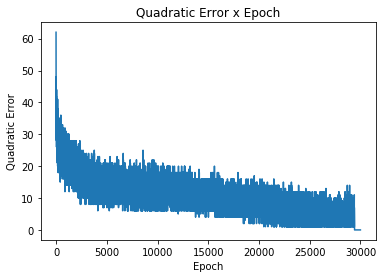

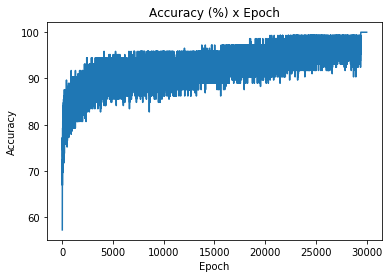

Weights:
[  9.65428311   1.05548554 -15.24177971  11.86225193  -3.91035954
   2.40944029 -13.9248031   -4.18410752   4.18151502   2.69006444
   2.1021032    9.58833457  -5.08644882  -2.9405568    3.67853754
  -2.45456827  -4.41041232   4.21860992   2.82167977  -3.35042578
   1.1978919    3.99531895  -3.57897692   7.58809471  -2.9549073
  -3.43449207   4.05974077  -2.96365218   2.85034717   3.38314076
  -7.45949325   4.09343181   1.89046133  -3.01390221   1.69595082
  -2.44207337  -2.92046862  -0.2716873    3.69368219  -5.3097855
   2.09801493   0.79425557   4.57640921  -2.15302529   2.87656228
   4.7346494  -12.25598754  17.10156614   8.53093556 -16.65368736
  18.44786355   6.92481284   9.71189485  10.05935982  -8.56434931
  -3.57287735  -1.69940224   3.18406738   5.30938637   5.45253105
  -4.97855199]
Confusion matrix on test database:
[[25  8]
 [ 8 22]]


In [11]:

class Neuron:
    
    # Constructor
    
    def __init__(self, n_inputs, lRate):
        self.lRate = lRate
        self.weights = np.random.rand(n_inputs + 1) * 0.2 - 0.1 # Num. features + 1 (bias)
    
    # Prediction

    def predict(self, inputs):
        activation = np.dot(np.append(inputs, 1.0), self.weights)
        return 1.0 if activation >= 0.0 else 0.0

    # Learn

    def learn(self, trainingSet_inputs, trainingSet_outputs, nEpoch):
        #weights = np.random.rand(61) * 0.2 - 0.1 # Num. features + 1 (bias)
        error_list = []
        accuracy_list = []
        for epoch in range(nEpoch):
            sumError = 0.0
            for inputs, output in zip(trainingSet_inputs, trainingSet_outputs) :
                prediction = self.predict(inputs)
                error = output - prediction
                sumError += error ** 2
                self.weights = self.weights + self.lRate * error * np.append(inputs, 1.0)
            error_list.append(sumError)
            accuracy = 100*(len(trainingSet_outputs)-sumError)/len(trainingSet_outputs)
            accuracy_list.append(accuracy)
            print ('Epoch %d Error: %.3f Accuracy: %.3f (%%)' % (epoch+1,sumError, accuracy))
        plt.plot(error_list)
        plt.title('Quadratic Error x Epoch')
        plt.ylabel('Quadratic Error')
        plt.xlabel('Epoch')
        fig = plt.gcf() # stores figure to save it
        fig.savefig('error.png')
        plt.show()
        plt.plot(accuracy_list)
        plt.title('Accuracy (%) x Epoch')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        fig = plt.gcf() # stores figure to save it
        fig.savefig('accuracy.png')
        plt.show()
        return self.weights

# Main (Single neuron Perceptron)

#train_data = np.array(train_df)
#test_data = np.array(test_df)
lRate   = 0.04
nEpoch  = 30000
n_inputs = len(X_train[0])
perceptron = Neuron(n_inputs, lRate)
weights = perceptron.learn(X_train, y_train, nEpoch)
print ('Weights:\n{}'.format(weights))
y_pred = []
for row in X_test:
    y_pred.append(perceptron.predict(row))

cm      = confusion_matrix(y_test, y_pred)
#cr      = classification_report(y_test, y_pred) 
print('Confusion matrix on test database:\n{}'.format(cm))
#print('Classification report on test database:\n{}'.format(cr))

In [22]:
####################################### Visualização da Matriz de Confusão ######################################################

import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Desejada')
    plt.xlabel('Classe Obtida')

Matriz de Confusão Normalizada
             precision    recall  f1-score   support

        0.0       0.76      0.76      0.76        33
        1.0       0.73      0.73      0.73        30

avg / total       0.75      0.75      0.75        63



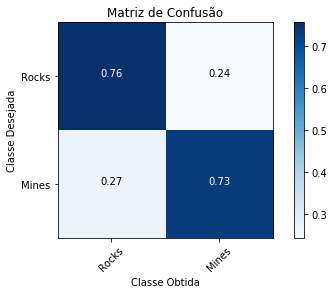

In [23]:
from sklearn import metrics
classes = ['Rocks', 'Mines']
plot_confusion_matrix(cm, classes, normalize=True)
print (metrics.classification_report(y_test, y_pred))